<a href="https://colab.research.google.com/github/raviteja41/deep-learning-1/blob/master/EIP4_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


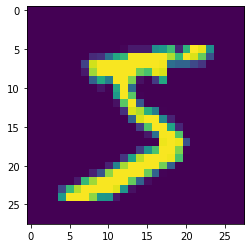

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

(60000, 28, 28)


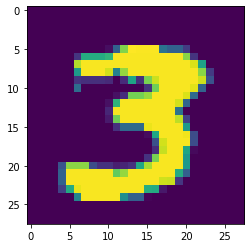

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[27])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [13]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(256,3,activation='relu'))
model.add(Convolution2D(512,3,activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Convolution2D(32,1,activation='relu'))
model.add(Convolution2D(16,3,activation='relu'))
model.add(Convolution2D(10,9))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 512)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 94s 2ms/step - loss: 0.1244 - acc: 0.9621
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0500 - acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0373 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0300 - acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0234 - acc: 0.9923
Epoch 6/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0199 - acc: 0.9936
Epoch 7/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0167 - acc: 0.9944
Epoch 8/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0157 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0141 - acc: 0.9952
Epoch 10/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0113 - acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.03449655043925795, 0.9919]
